In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
aws_val_predict.ipynb
data_1_extra_data.ipynb
data_2_without_scale_05.ipynb
data_3_with_scale_05.ipynb
data_4_with_scale_05_03_only_centers.ipynb
data_5_with_scale_05_centers_contour.ipynb
ensemble_03_052018-04-11 15:02:55.505835.csv
ensemble_32_bs_04_042018-04-10 23:36:53.704618.csv
ensemble_32_bs_04_042018-04-11 00:36:48.264580.csv
ensemble_32_bs2018-04-10 23:35:29.953573.csv
ensemble_not_logarithm_vgg11_04_042018-04-11 10:03:44.265895.csv
logs/
models/
models_553.zip
only_centers_local_689_2018-04-10 23:19:42.368405.csv
optinal_data_scale.ipynb
predict_1_without_scale_predict.ipynb
predict_2_with_scale_test.ipynb
predict_3_ensemble.ipynb
test_predict.ipynb
train_1_without_scale_05.ipynb
train_2_with_scale_05.ipynb
train_3_with_scale_05_03_only_centers.ipynb
train_4_with_scale_05_vgg11-600.ipynb
train_5_with_scale_not_pretrained.ipynb
train_6_with_scale_05_32_not_logarithm-vgg11.ipynb
train_7_with_scale_05_centers_contour.ipynb
train_8_with_scale_05_32_not_logarithm.ipynb
train_8_with_scale_05_centers_contour-vgg11.ipynb

aws_val_predict.ipynb
data_1_extra_data.ipynb
data_2_without_scale_05.ipynb
data_3_with_scale_05.ipynb
data_4_with_scale_05_03_only_centers.ipynb
data_5_with_scale_05_centers_contour.ipynb
ensemble_03_052018-04-11 15:02:55.505835.csv
ensemble_32_bs_04_042018-04-10 23:36:53.704618.csv
ensemble_32_bs_04_042018-04-11 00:36:48.264580.csv
ensemble_32_bs2018-04-10 23:35:29.953573.csv
ensemble_not_logarithm_vgg11_04_042018-04-11 10:03:44.265895.csv
logs/
models/
models_553.zip
only_centers_local_689_2018-04-10 23:19:42.368405.csv
optinal_data_scale.ipynb
predict_1_without_scale_predict.ipynb
predict_2_with_scale_test.ipynb
predict_3_ensemble.ipynb
test_predict.ipynb
train_1_without_scale_05.ipynb
train_2_with_scale_05.ipynb
train_3_with_scale_05_03_only_centers.ipynb
train_4_with_scale_05_vgg11-600.ipynb
train_5_with_scale_not_pretrained.ipynb
train_6_with_scale_05_32_not_logarithm-vgg11.ipynb
train_7_with_scale_05_centers_contour.ipynb
train_8_with_scale_05_32_not_logarithm.ipynb
train_8_wit

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)

import sys
sys.path.append('../../dstorch/')

import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from dstorch import preprocessing, draw, transforms, predict, postprocessing, metrics, utils, io
import cv2
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

In [3]:
TEST_PATH = '../data/stage1_test/'
test_ids, _ = io.read_test_data(TEST_PATH, d=3)

test_images = []
for _id in tqdm(test_ids):
    test_images.append(cv2.imread("../output_data/with_scale_05/test/{}.png".format(_id)))

100%|██████████| 65/65 [00:00<00:00, 203.67it/s]


In [4]:
def get_predictions(model_path, ids, images, path_images, resize):
    transform = transforms.DualCompose(
        [
            transforms.ImageOnly(transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]))
        ]
    )
    model = torch.load(model_path)
    predictions = predict.predict(model, ids, path_images, transform, 64, 2, 1)

    if resize:
        predictions = [cv2.resize(x, (y.shape[1], y.shape[0])) for x, y in zip(predictions, images)]

    return predictions

In [5]:
def weighted_sum(predictions, weights):
    return np.sum(np.stack(predictions) * np.array(weights)[..., np.newaxis, np.newaxis, np.newaxis], axis=0) / np.sum(weights)


def make_ensemble(weights, *all_predictions):
    return [weighted_sum(predictions, weights) for predictions in zip(*all_predictions)]

In [6]:
with_scale_05_589_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:11<00:00,  5.86it/s]


In [7]:
with_scale_05_03_only_centers_689_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_03_only_centers_700/local_689.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:10<00:00,  6.30it/s]


In [8]:
with_scale_05_589_vgg11_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_vgg11/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:04<00:00, 13.13it/s]


In [9]:
with_scale_05_589_not_pretrained_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600_not_pretrained/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:10<00:00,  6.30it/s]


In [10]:
with_scale_05_589_32_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_epoch_600_not_logarithm/local_589.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:11<00:00,  5.77it/s]


In [11]:
with_scale_05_689_vgg11_32_centers_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_vgg11_centers_800/local_689.pth', test_ids, 
    test_images, '../output_data/with_scale_05_03_only_centers/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:04<00:00, 13.81it/s]


In [12]:
with_scale_05_689_vgg11_32_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_vgg11_800/local_689.pth', test_ids, 
    test_images, '../output_data/with_scale_05/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:04<00:00, 13.82it/s]


In [17]:
with_scale_05_789_centers_contour_predictions = get_predictions(
    'models/TernausNet34_with_scale_05_centers_contour_epoch_800/local_789.pth', test_ids, 
    test_images, '../output_data/with_scale_05_centers_contour/scaled_test/{}.png', True
)

Predict: 100%|██████████| 65/65 [00:11<00:00,  5.75it/s]


In [19]:
test_predictions = make_ensemble(
    [0.12, 0.14, 0.14, 0.09, 0.14, 0.14, 0.14, 0.09], 
    with_scale_05_589_predictions,
    with_scale_05_03_only_centers_689_predictions,
    with_scale_05_589_vgg11_predictions,
    with_scale_05_589_not_pretrained_predictions,
    with_scale_05_589_32_predictions,
    with_scale_05_689_vgg11_32_centers_predictions,
    with_scale_05_689_vgg11_32_predictions,
    [x[..., :3] for x in with_scale_05_789_centers_contour_predictions]
)

0


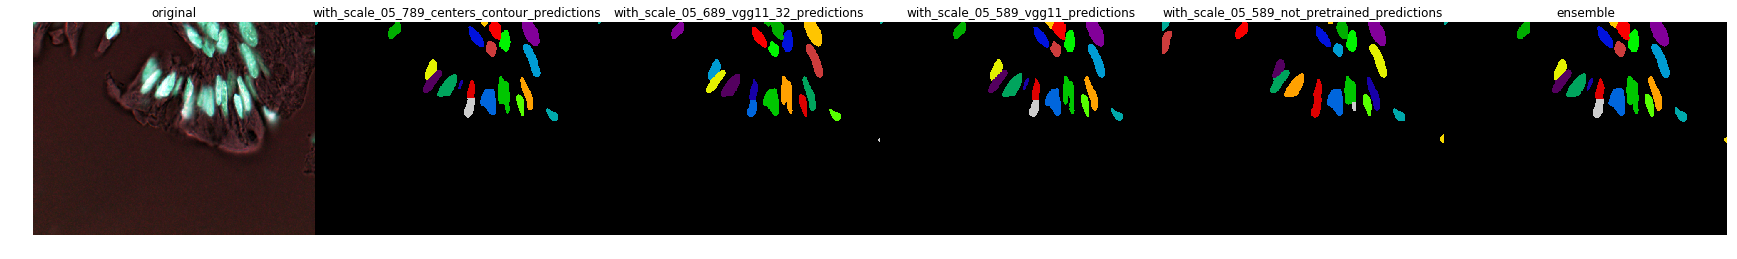

1


2


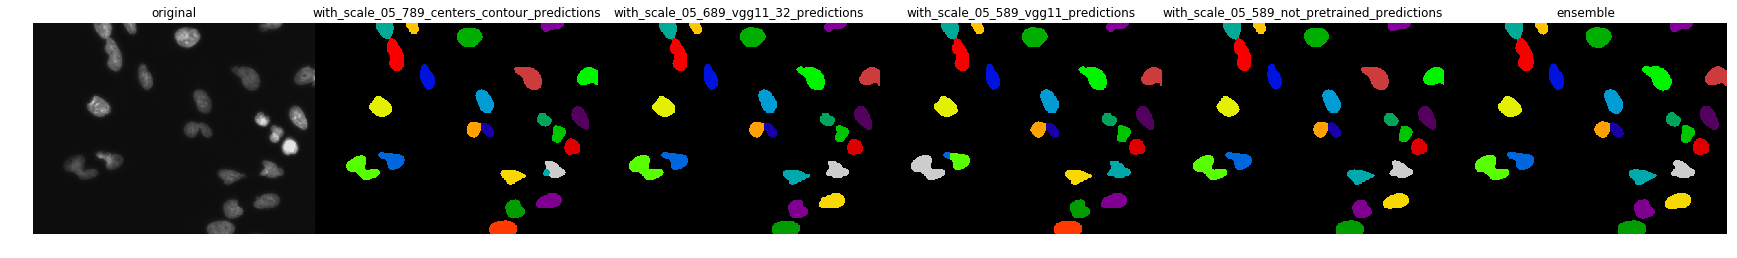

3


4


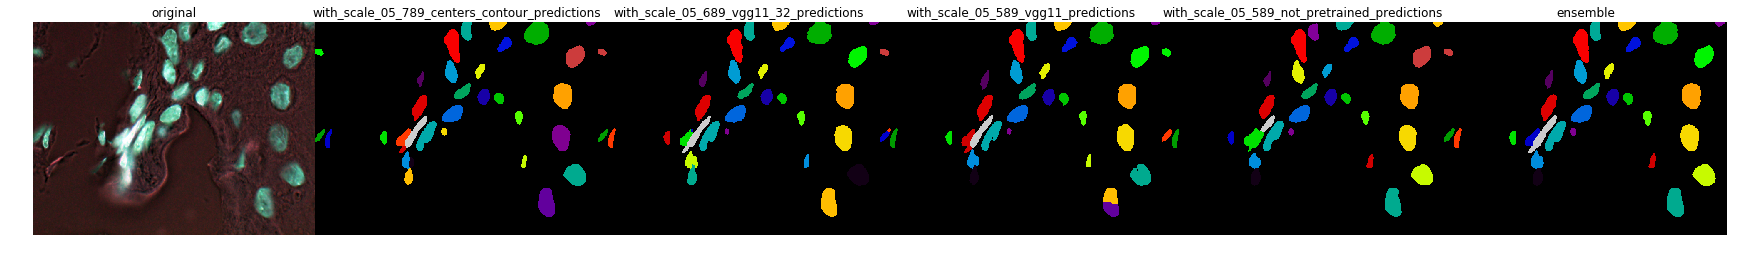

5


6


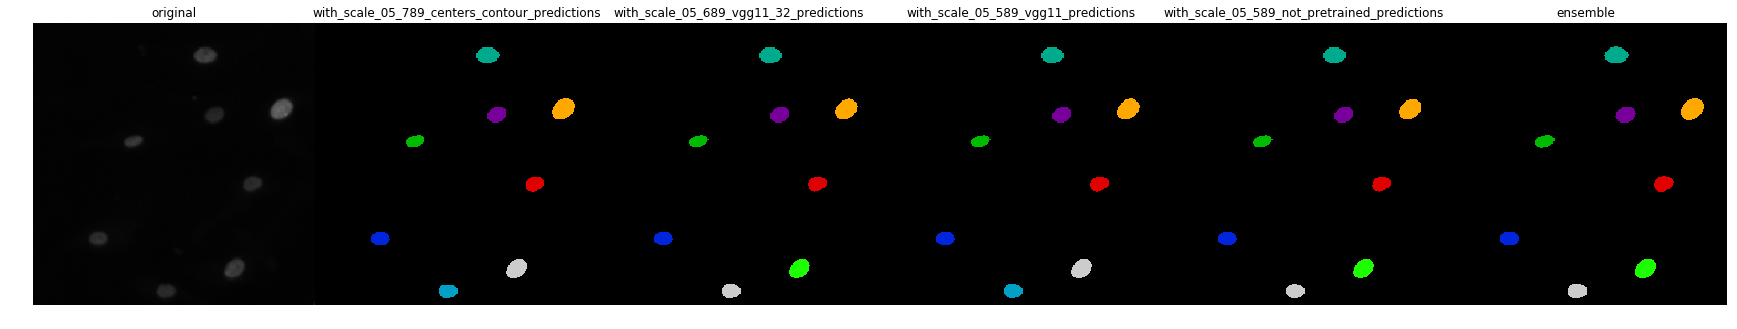

7


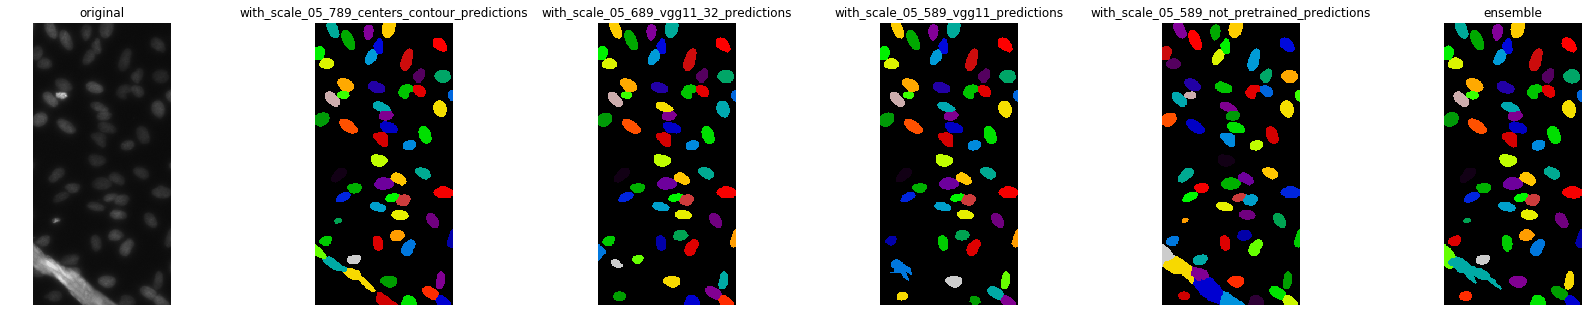

8


9


10


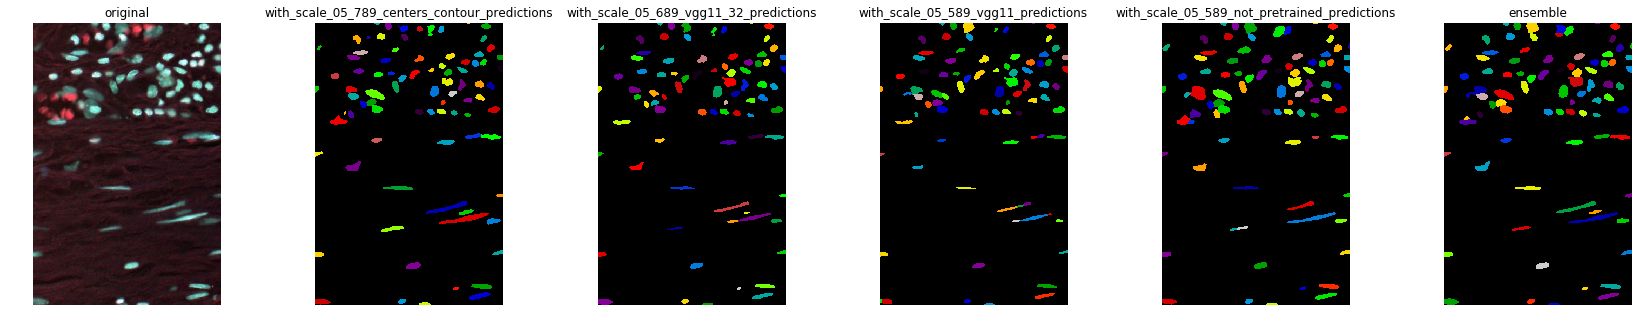

11


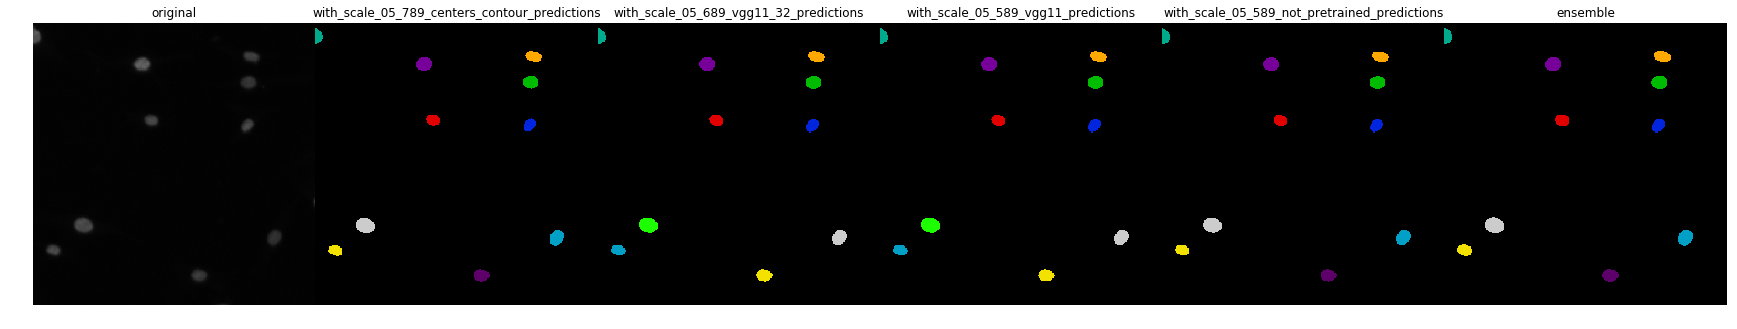

12


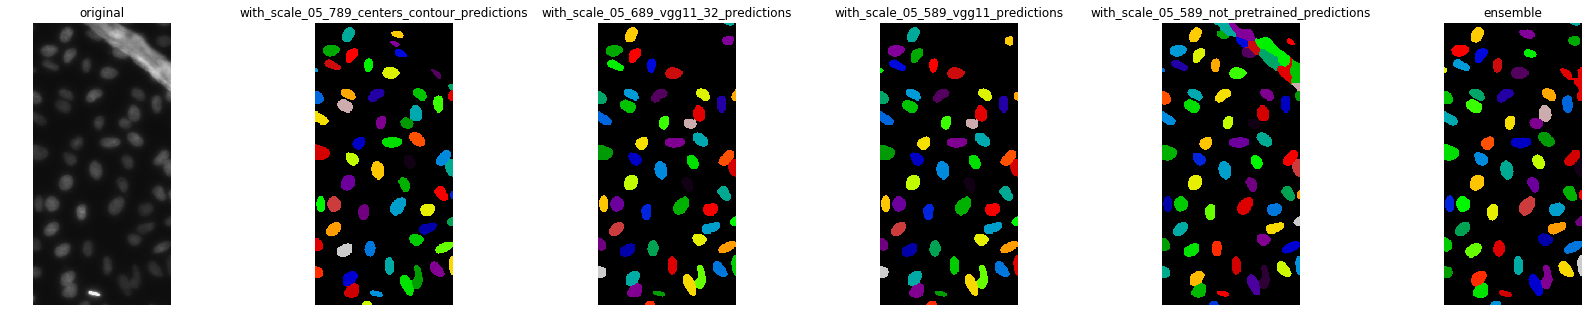

13


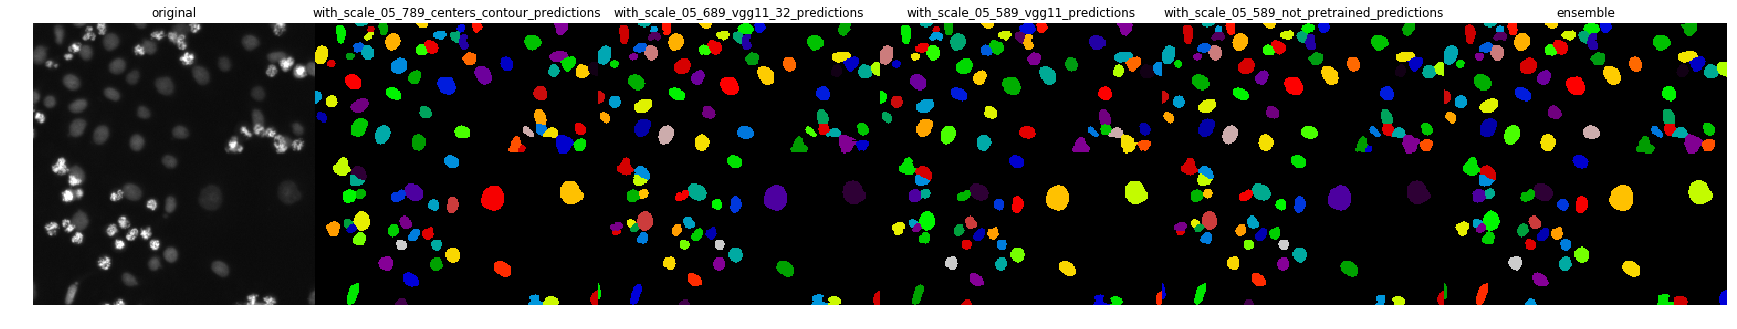

14


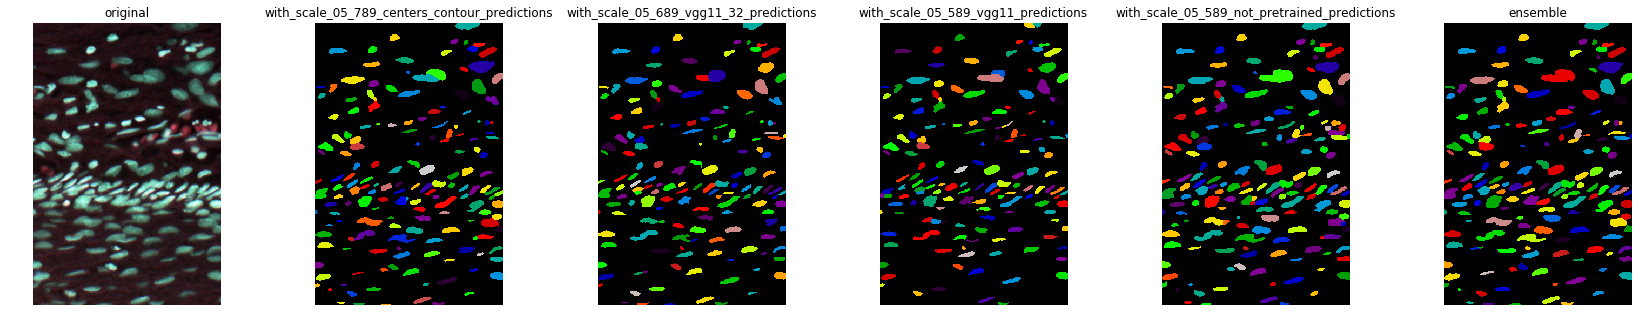

15


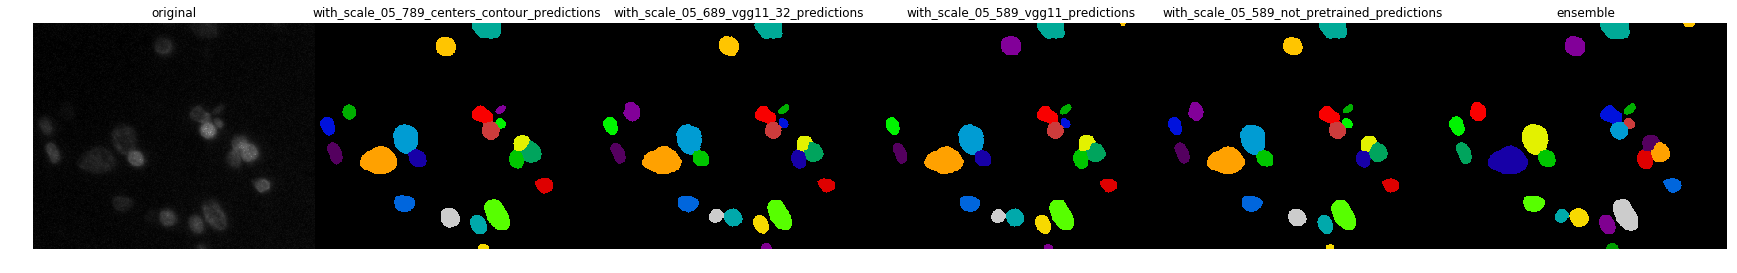

16


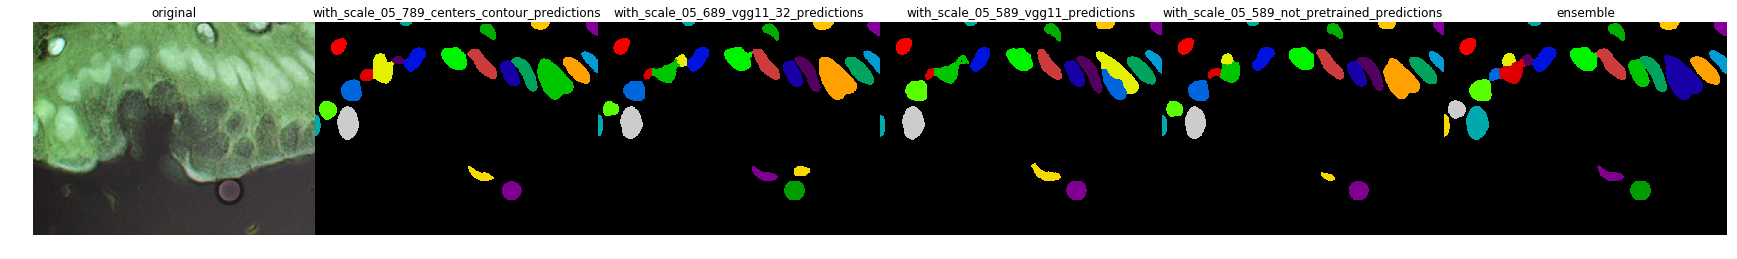

17


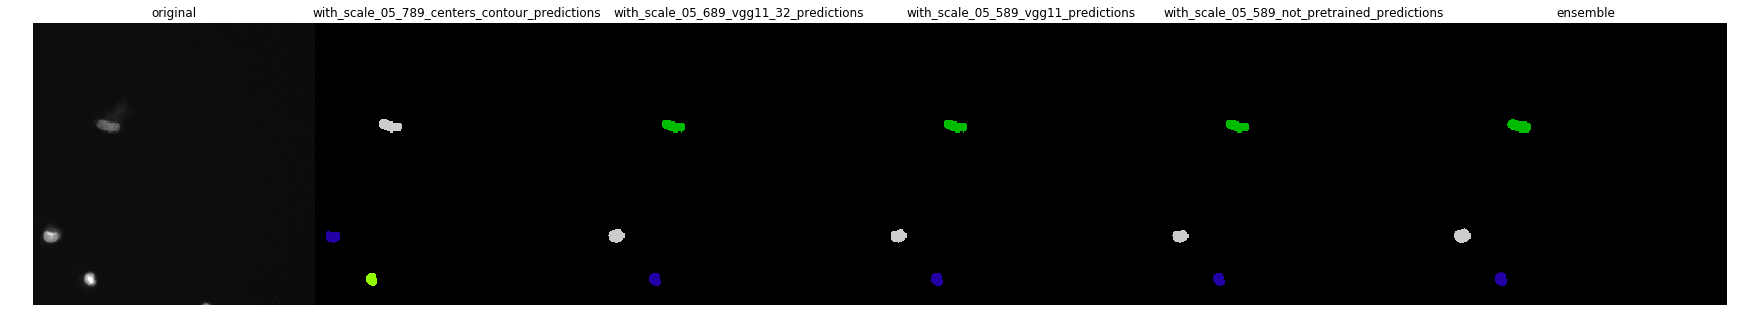

18


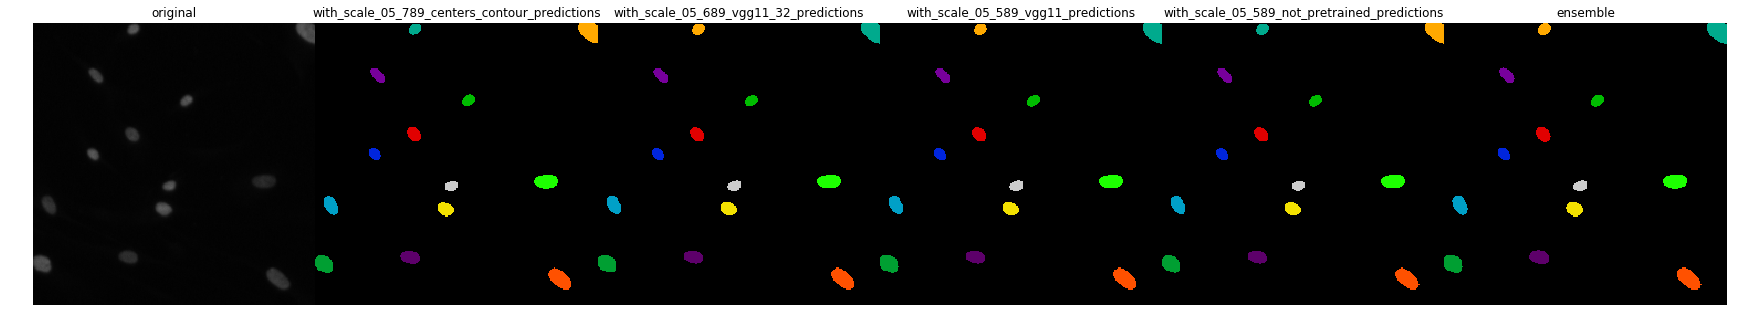

19


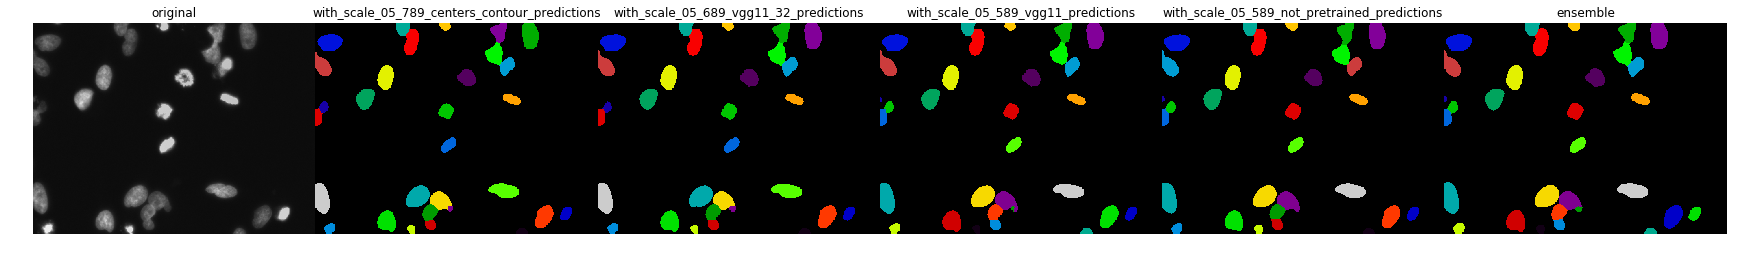

20


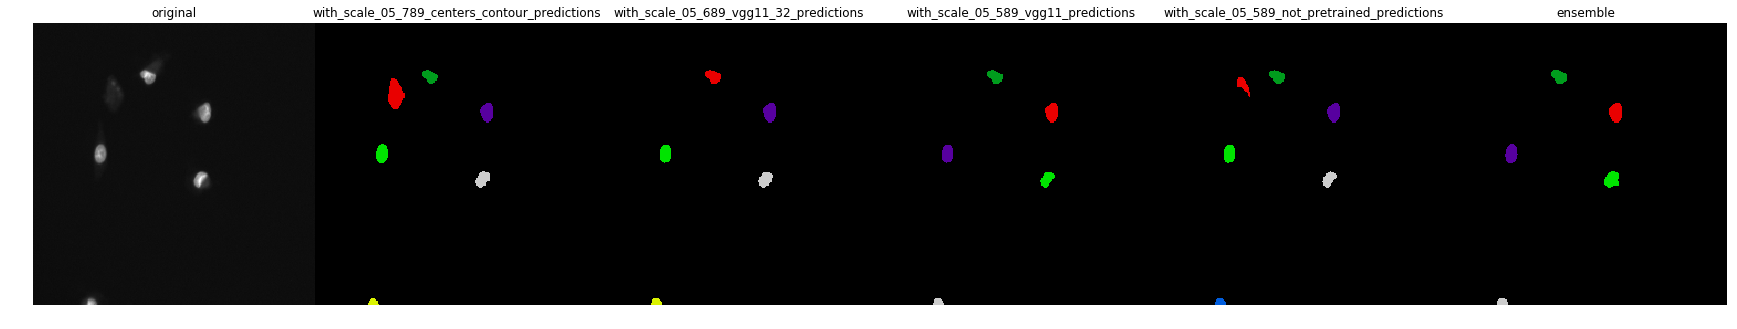

21


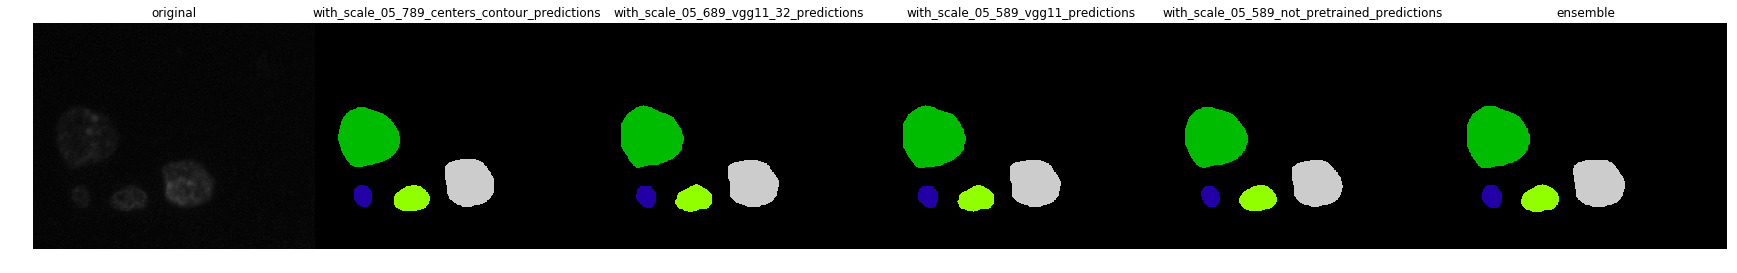

22


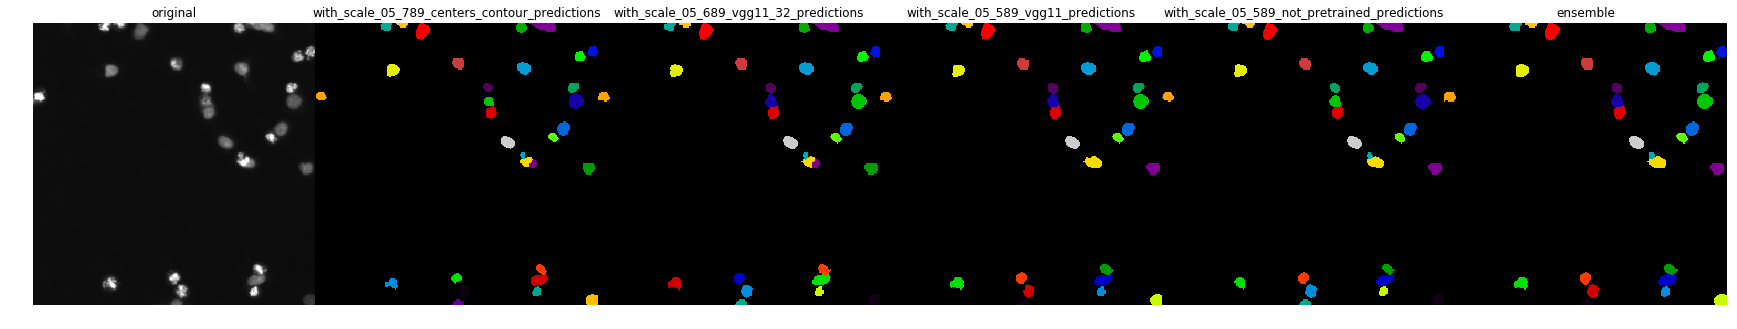

23


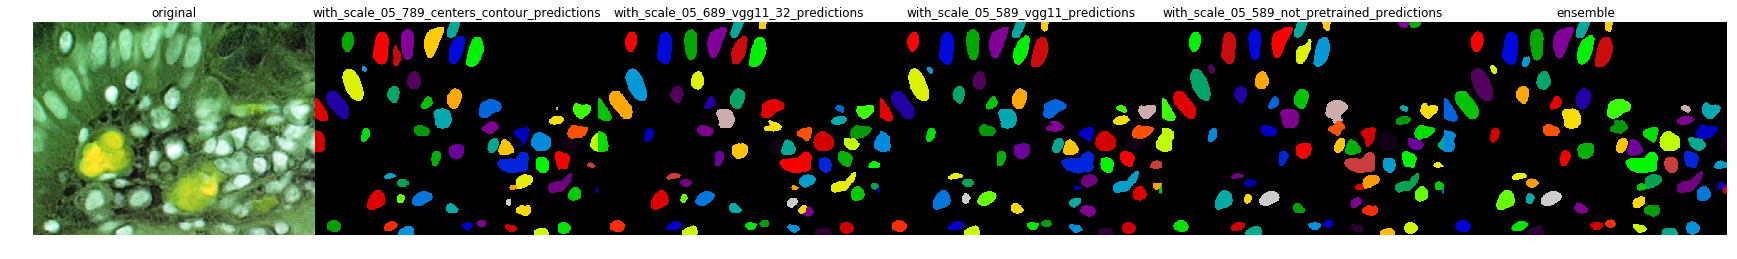

24


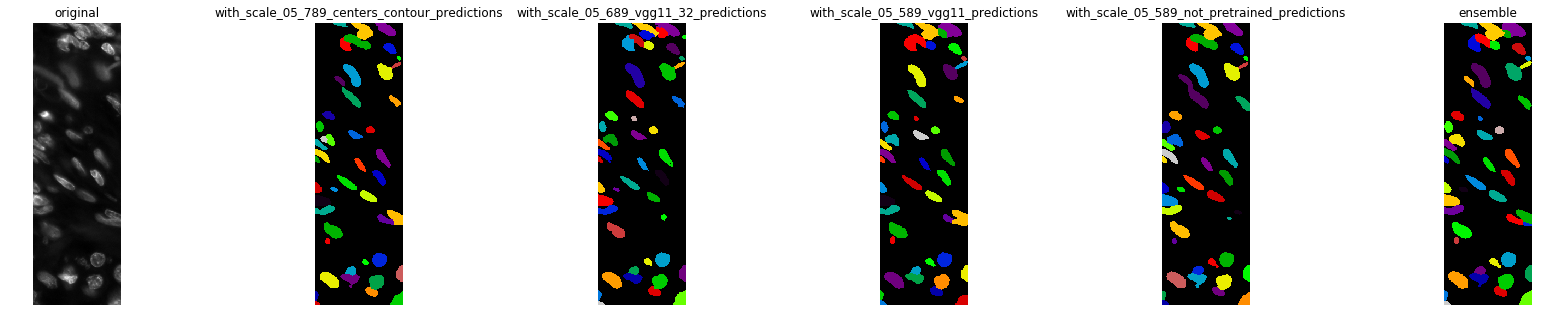

25


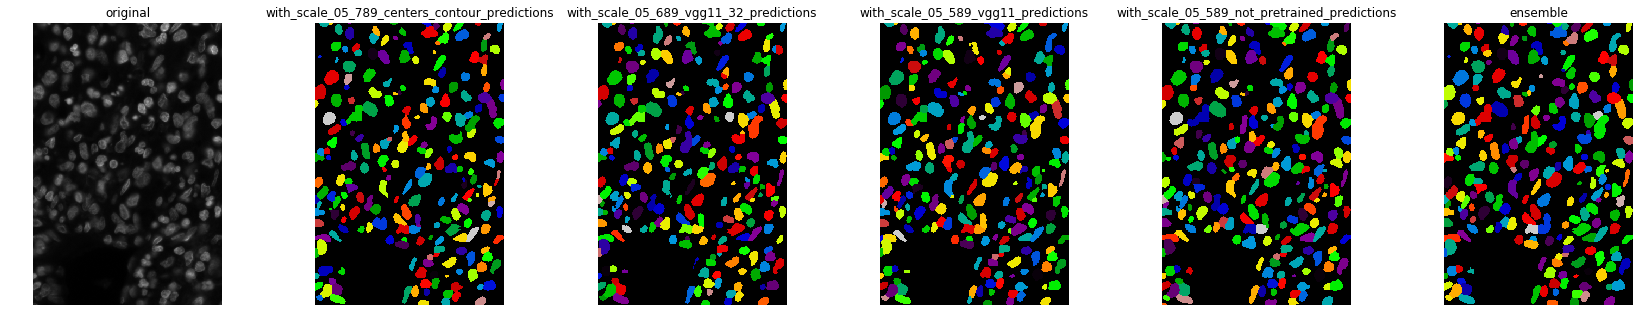

26


27


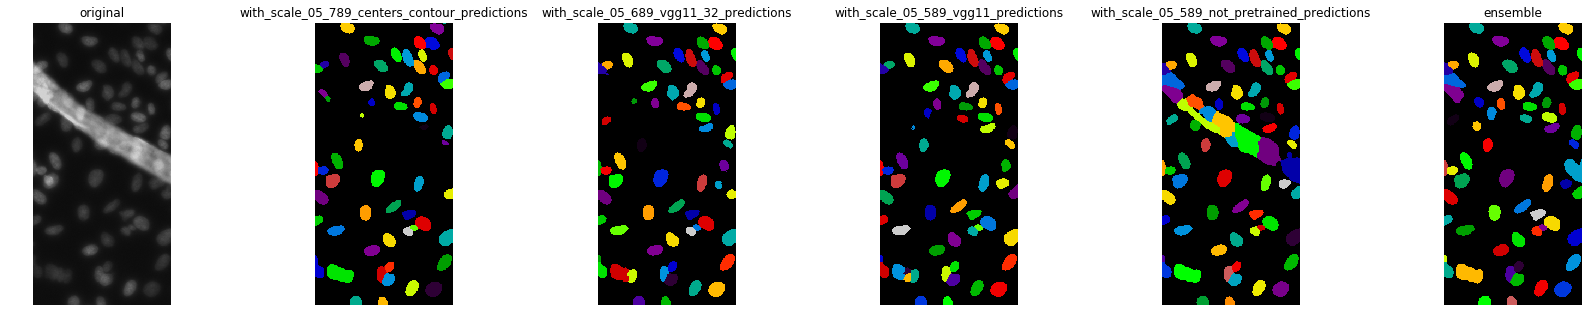

28


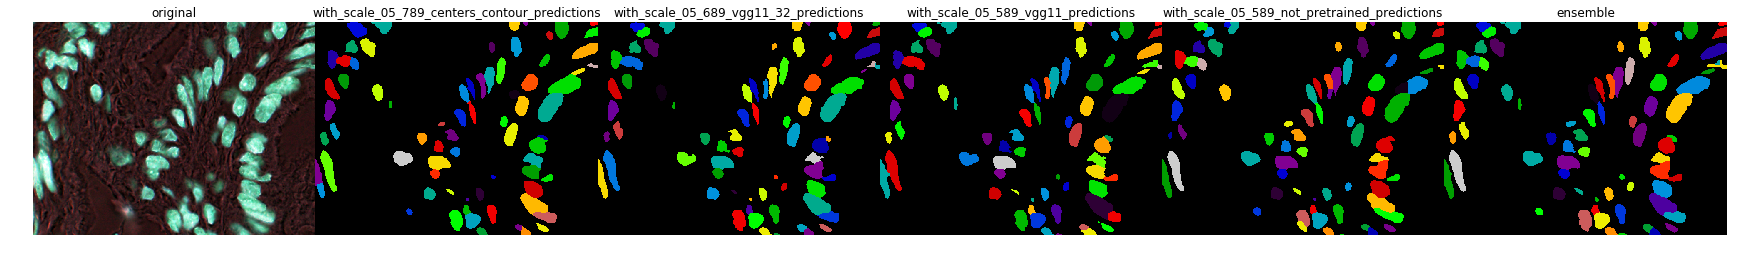

29


30


31


32


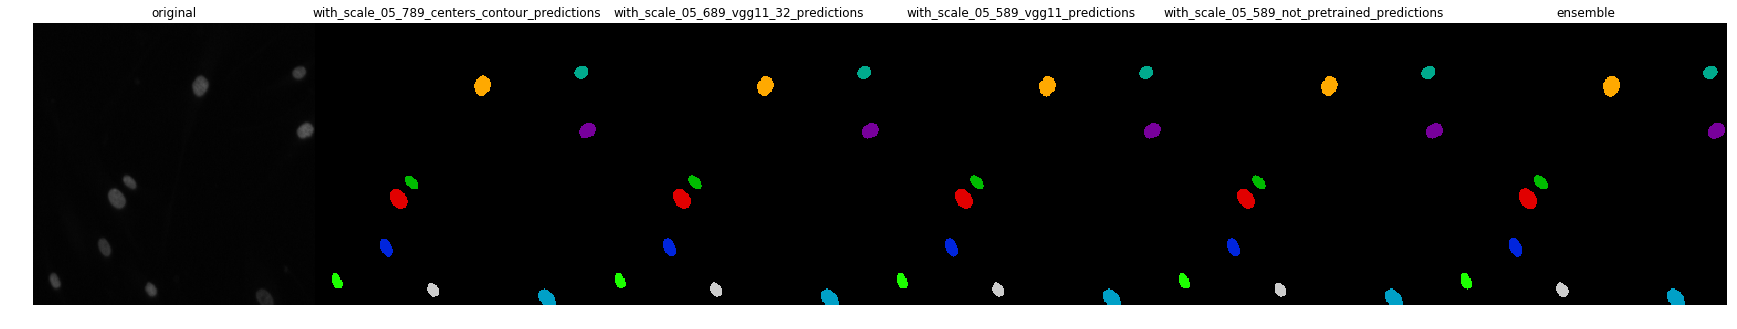

33


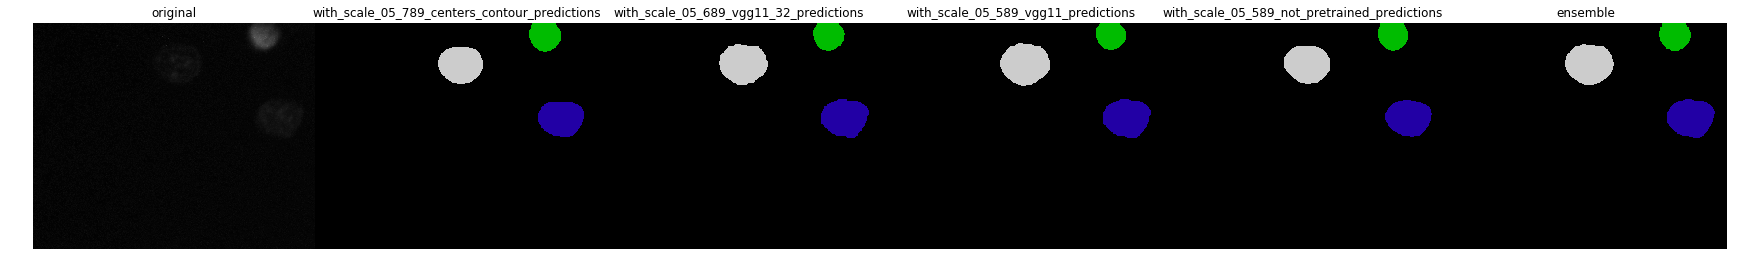

34


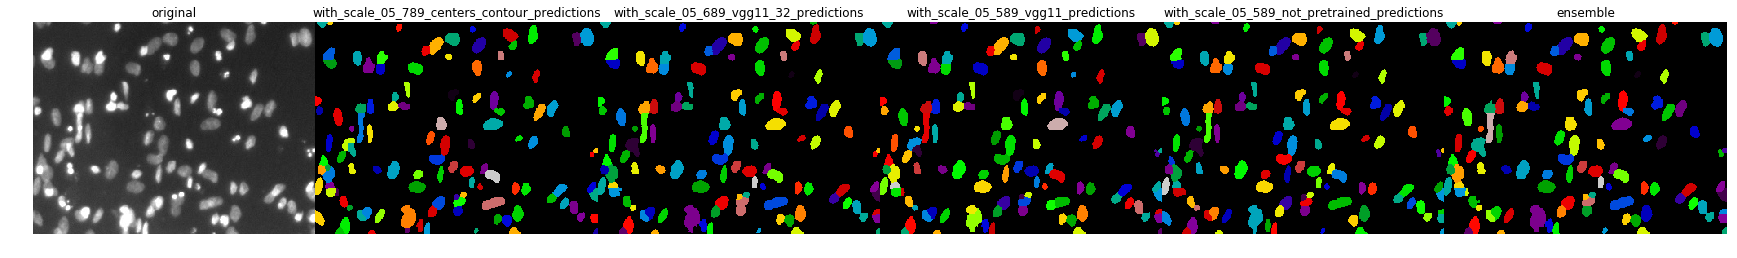

35


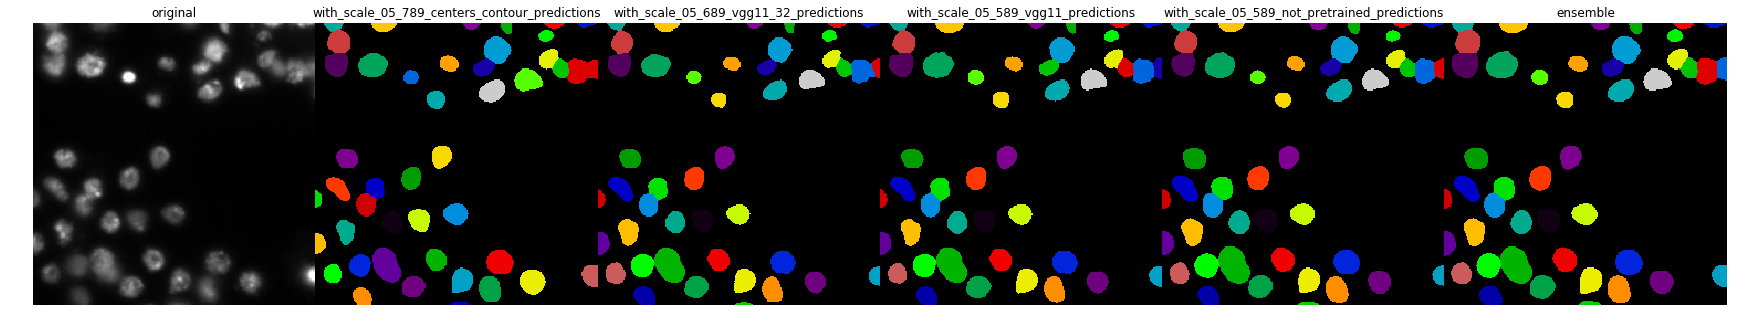

36


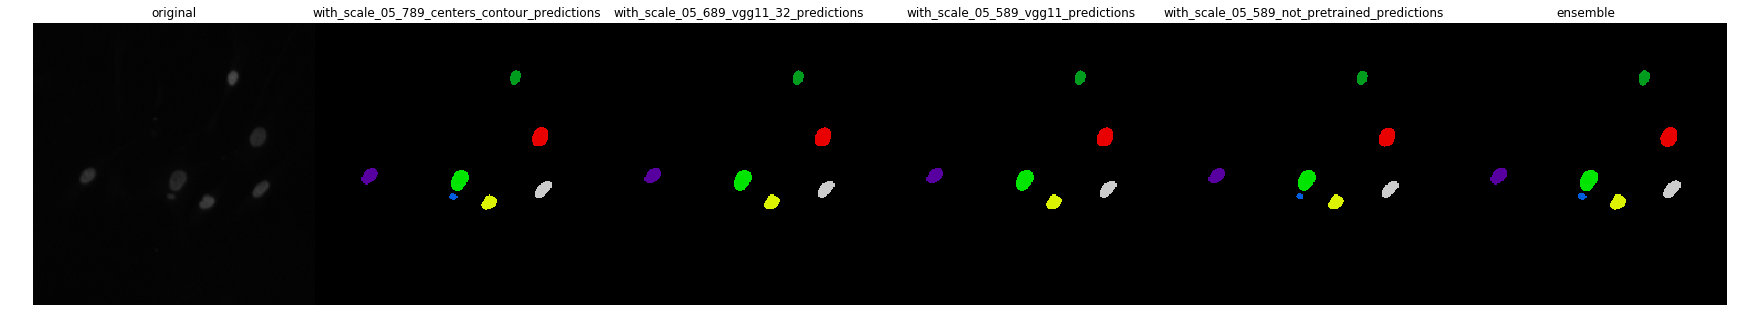

37


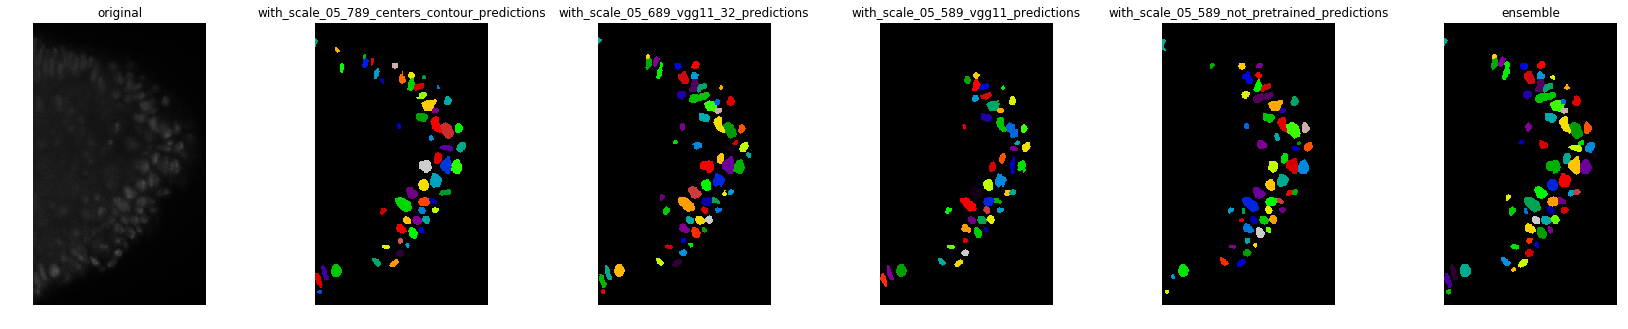

38


39


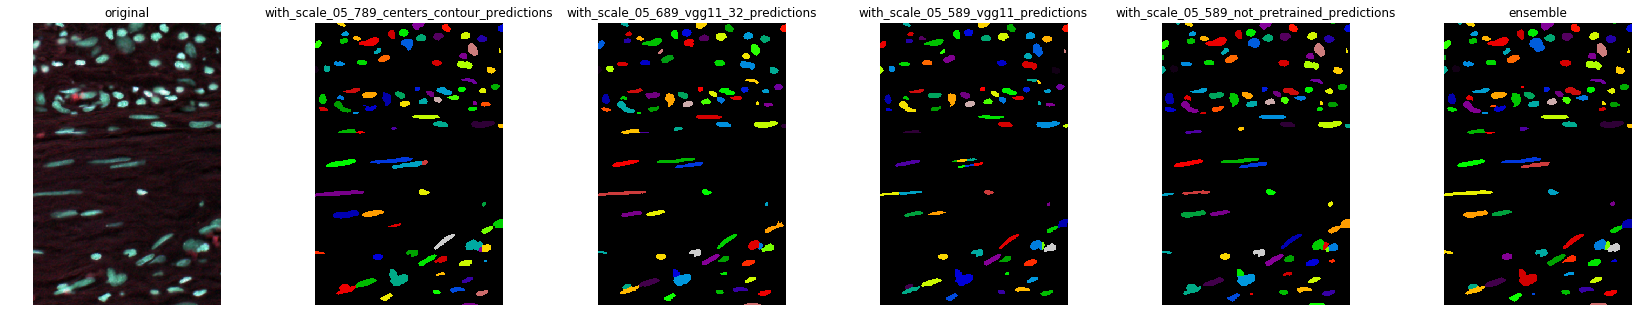

40


41


42


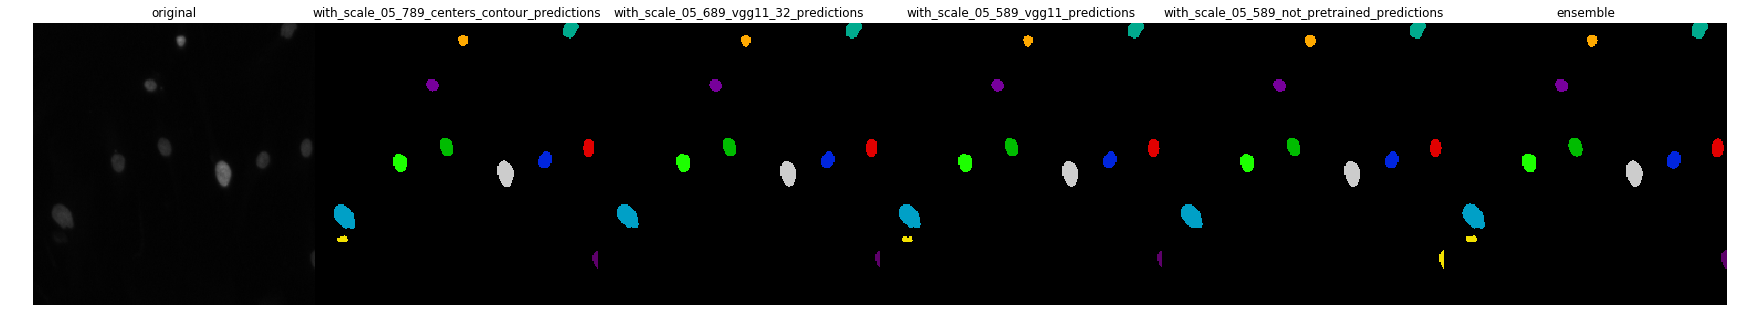

43


44


45


46


47


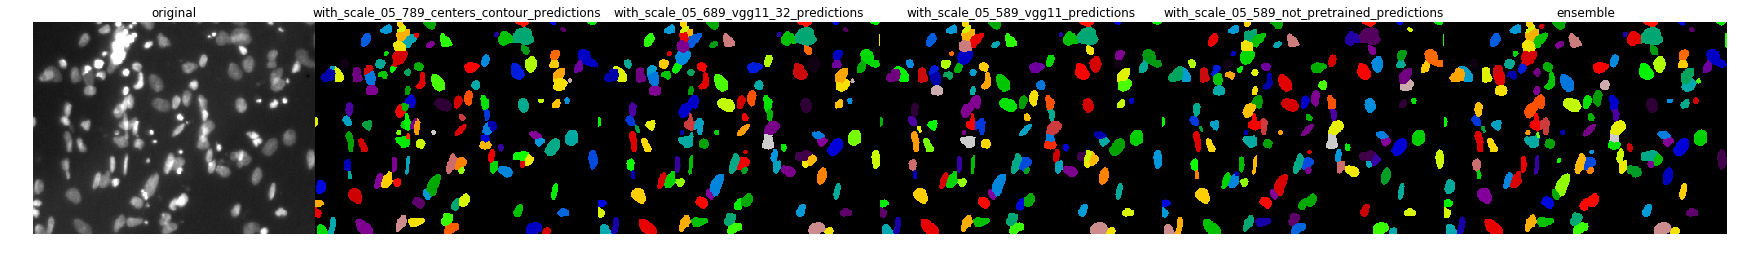

48


49


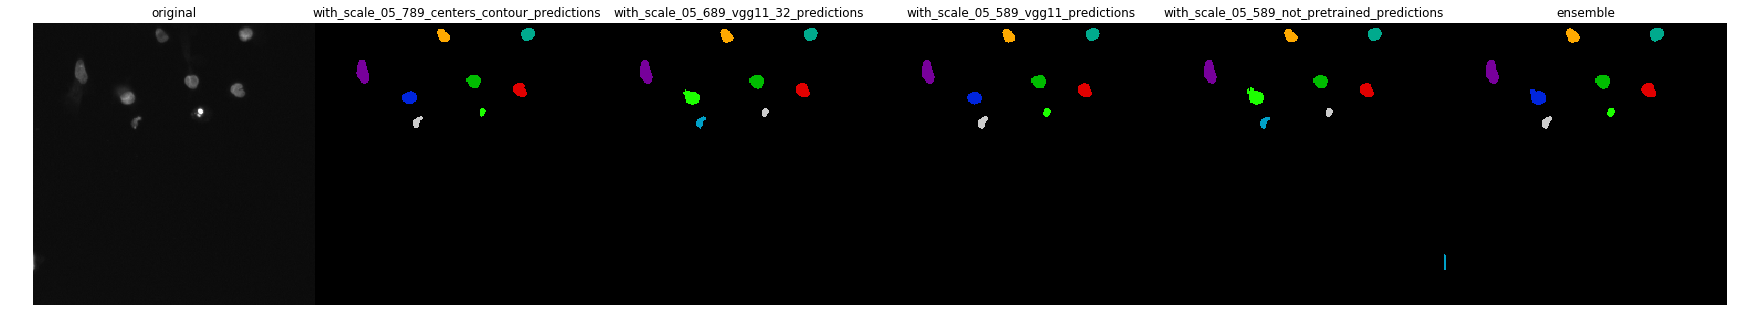

50


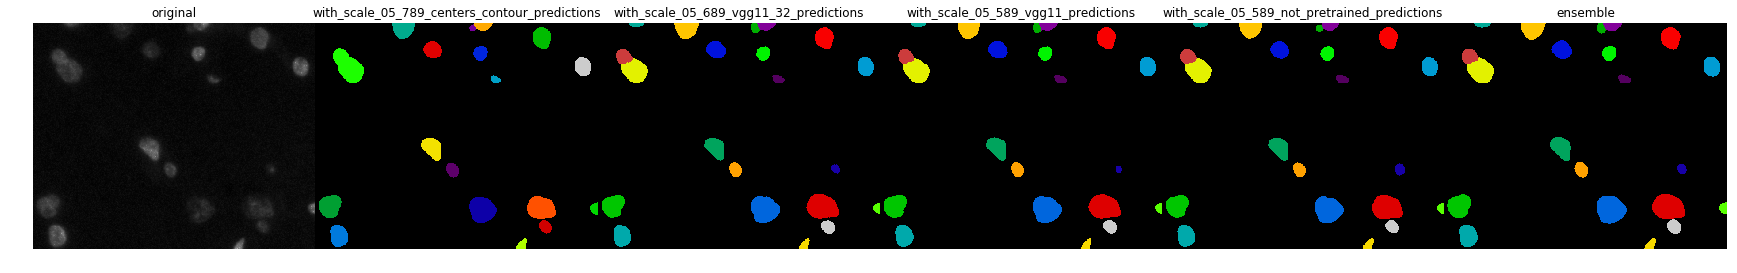

51


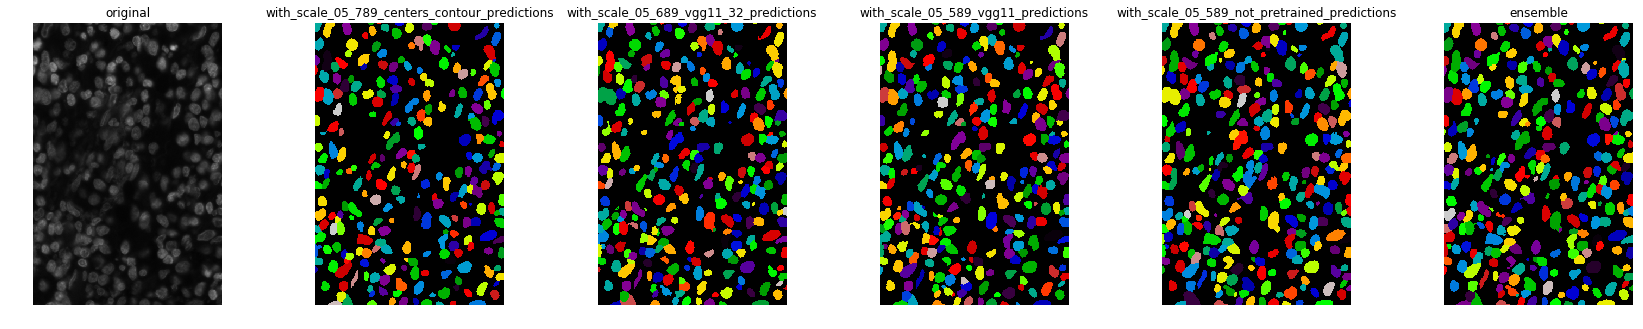

52


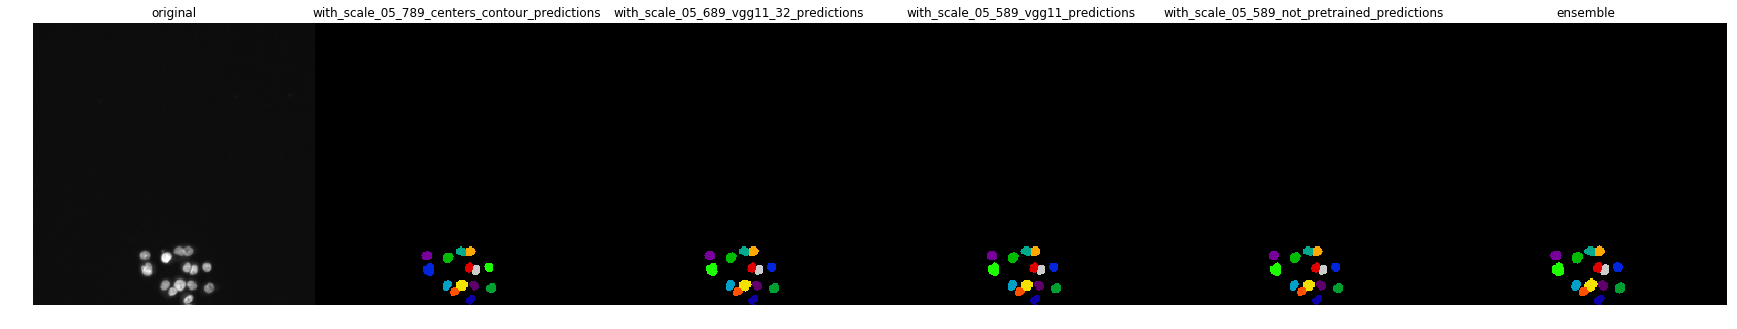

53


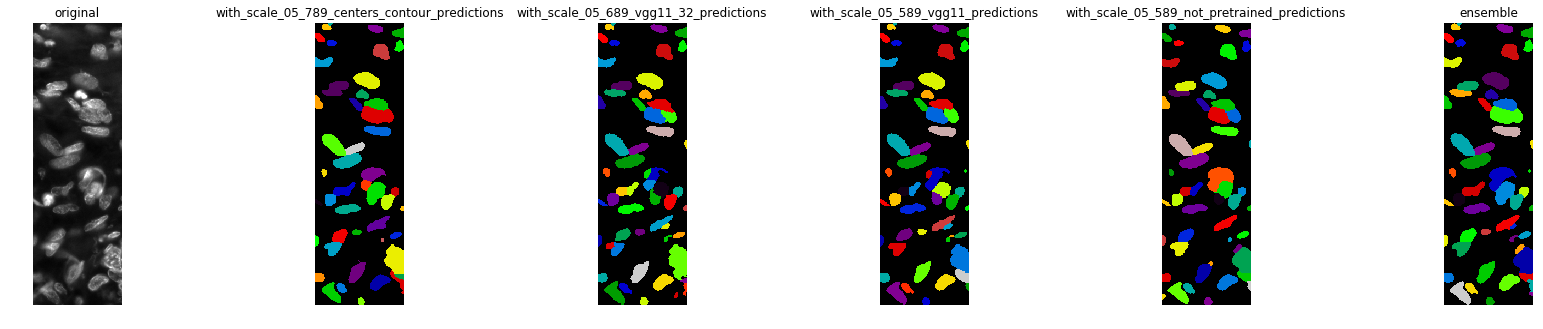

54


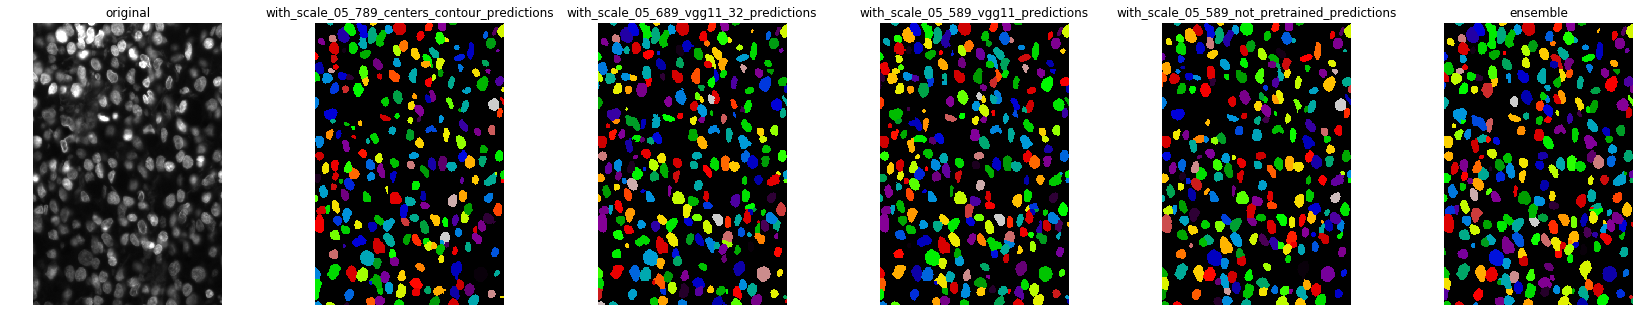

55


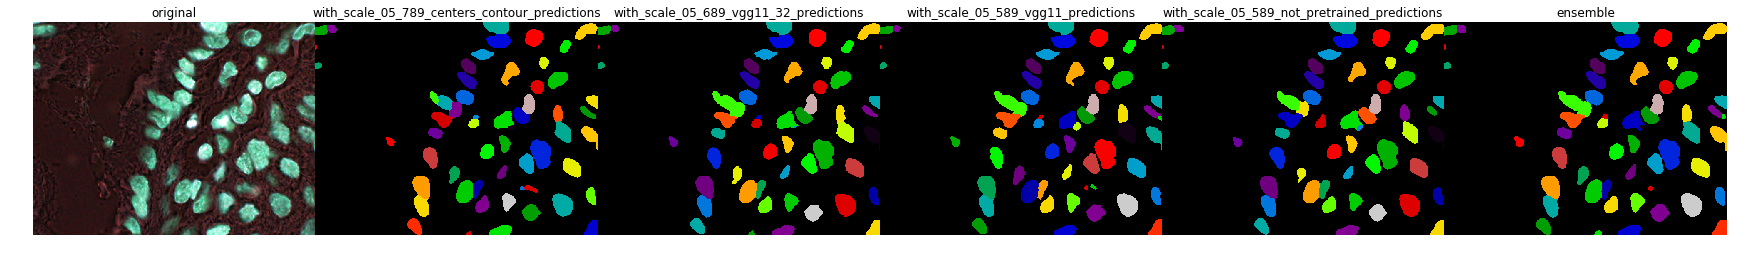

56


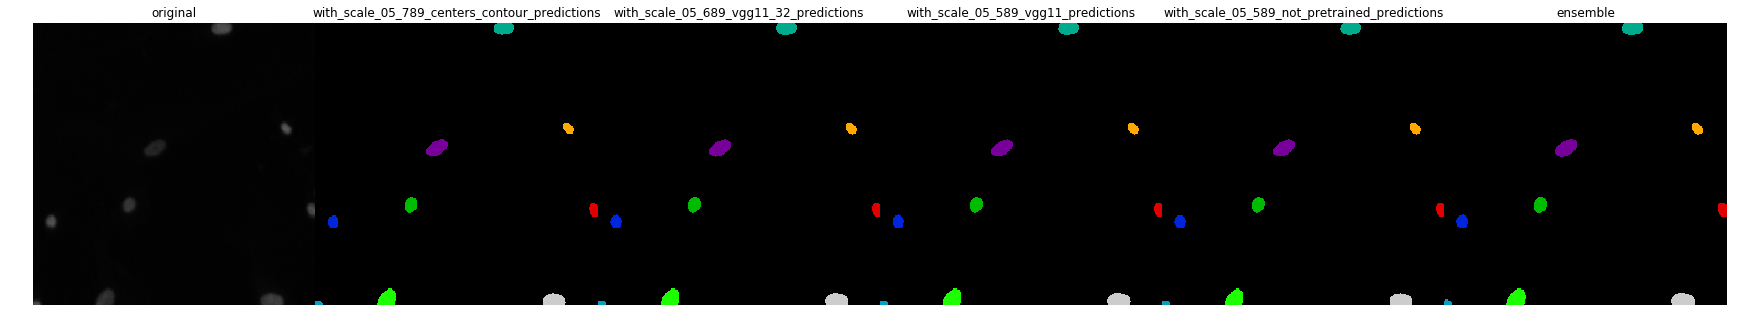

57


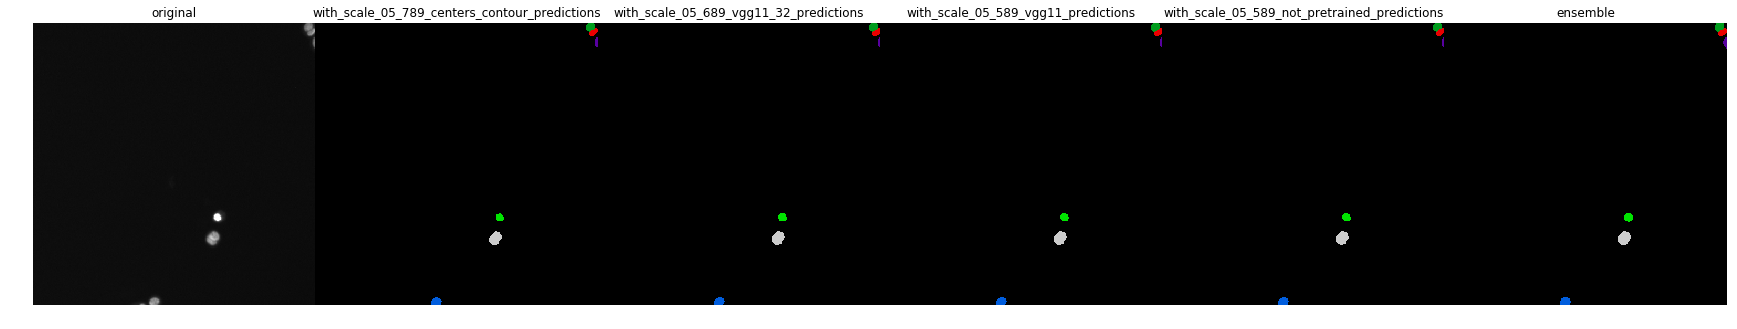

58


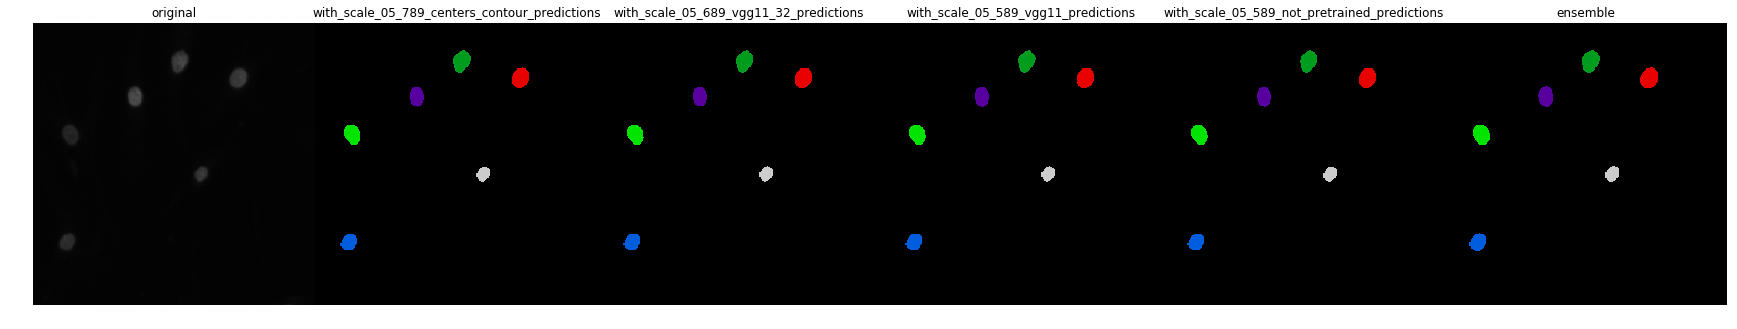

59


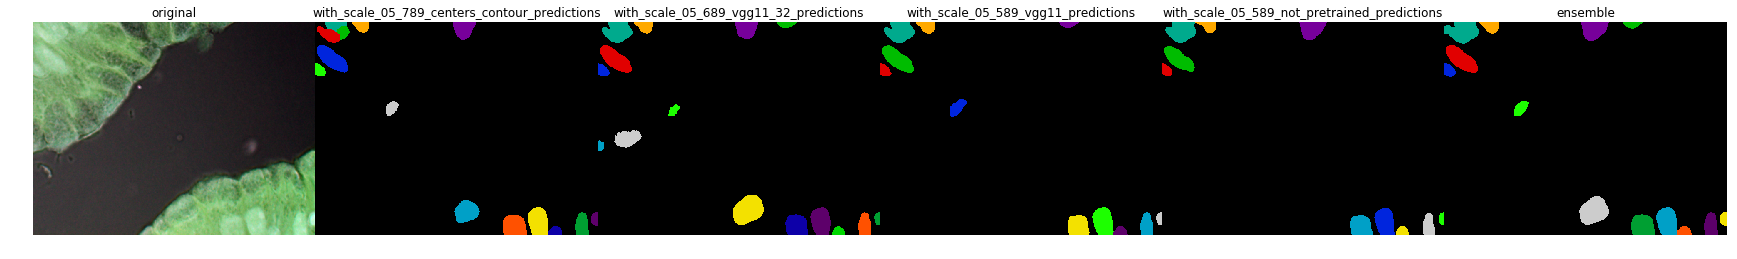

60


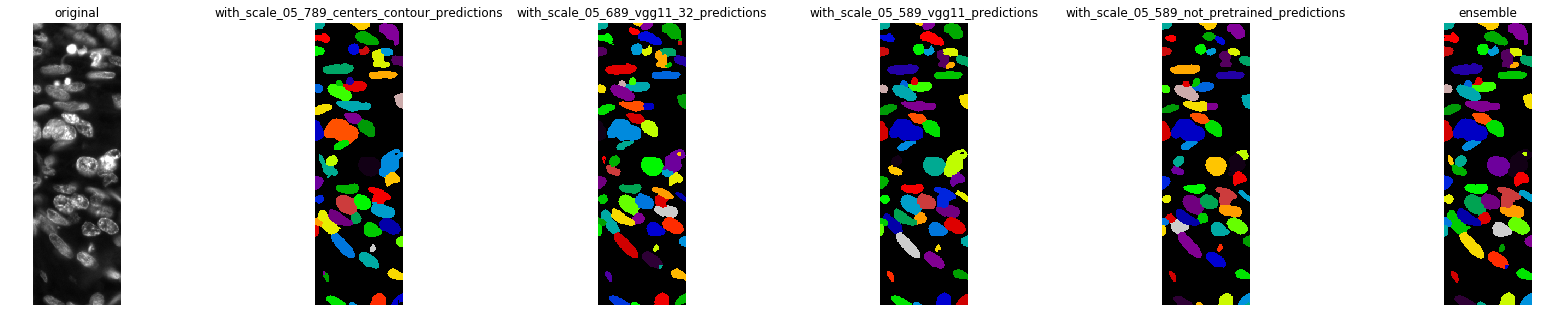

61


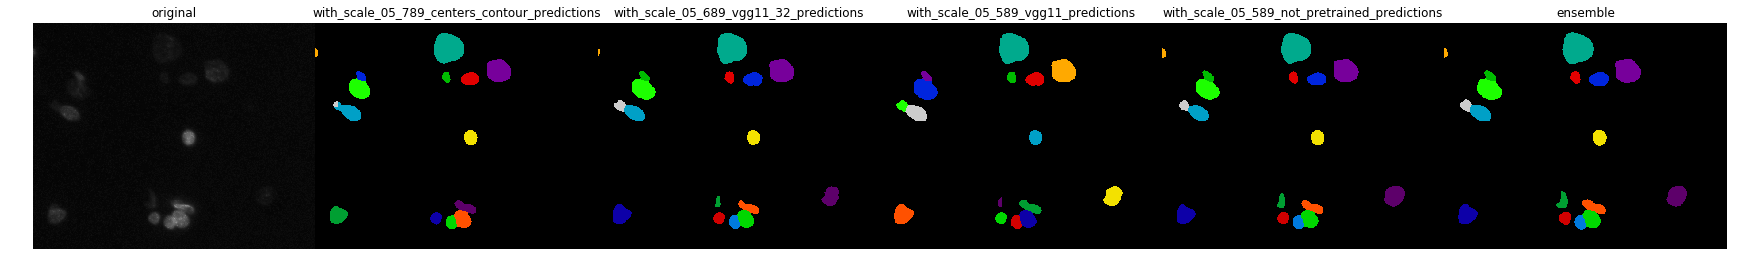

62


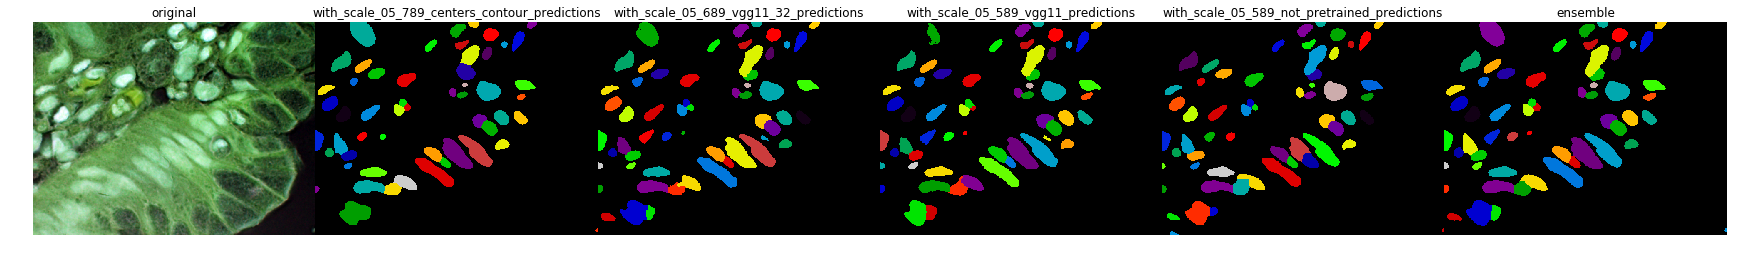

63


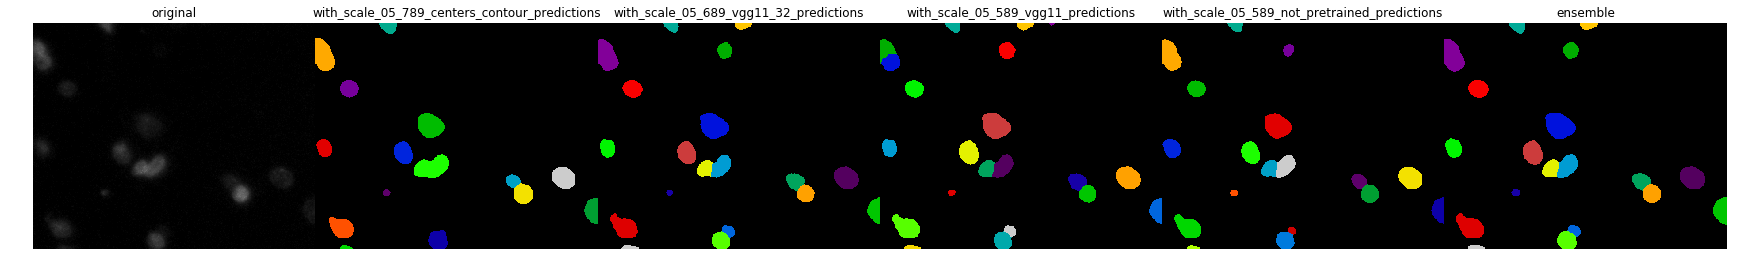

64


In [20]:
for i in range(len(test_images)):
    print(i)
    draw.plots({
      'original': test_images[i],
      'with_scale_05_789_centers_contour_predictions': postprocessing.watershed(
        with_scale_05_789_centers_contour_predictions[i], mask_threshold=0.5, center_threshold=0.5, padding_size=5, min_size=25) * 12367 % 1000,
      'with_scale_05_689_vgg11_32_predictions': postprocessing.watershed(
        with_scale_05_689_vgg11_32_predictions[i], mask_threshold=0.5, center_threshold=0.5, padding_size=5, min_size=25) * 12367 % 1000,
      'with_scale_05_589_vgg11_predictions': postprocessing.watershed(
        with_scale_05_589_vgg11_predictions[i], mask_threshold=0.5, center_threshold=0.5, padding_size=5, min_size=25) * 12367 % 1000,
      'with_scale_05_589_not_pretrained_predictions': postprocessing.watershed(
        with_scale_05_589_not_pretrained_predictions[i], mask_threshold=0.5, center_threshold=0.5, padding_size=5, min_size=25) * 12367 % 1000,
      'ensemble': postprocessing.watershed(
        test_predictions[i], mask_threshold=0.3, center_threshold=0.4, padding_size=5, min_size=25) * 12367 % 1000,
    }, scale=4, col_number=7)
    plt.show()

In [21]:
new_ids, rles = utils.mask2rle(test_predictions, test_ids, lambda x: postprocessing.watershed(
        x, mask_threshold=0.3, center_threshold=0.5, padding_size=5, min_size=25)
)

100%|██████████| 65/65 [00:03<00:00, 19.62it/s]


In [22]:
from datetime import datetime
sub = utils.make_submission(
    'submission_{}.csv'.format(datetime.now()), new_ids, rles
)

In [ ]:
from datetime import datetime
sub = utils.make_submission('../output_data/test_predict_labels.csv', new_ids, rles)